# Prediction using Supervised ML
## Task 1 (Level - Beginner)

### Predict the percentage of a student based on the no. of study hours.

 _- Maahey Noor Sayani_


### _Importing required libraries_

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### _Reading dataset and creating dataframe_

In [2]:
student_data = pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")
student_data.head() #print first 5 rows


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student_data.info() #Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### _Plotting the data Hours vs Score (Scatter Plot)_

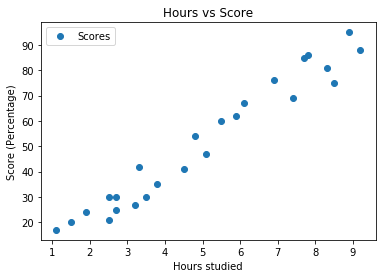

In [4]:
student_data.plot(x="Hours", y="Scores",style='o') #Scatter plot
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Score (Percentage)")
plt.show()

### _Preparing the data_

_Divide the data into "attributes" (inputs) and "labels" (outputs)_

In [5]:
x = student_data.iloc[:, :-1].values  # attributes - data used for prediction
y = student_data.iloc[:, 1].values  # labels - predicted results


In [6]:
print(x)
x.shape

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


(25, 1)

In [7]:
print(y)
y.shape

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


(25,)

### _Split dataset into training and test sets_

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

### _Training using Linear Regression_

In [9]:
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression()  
lin_reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


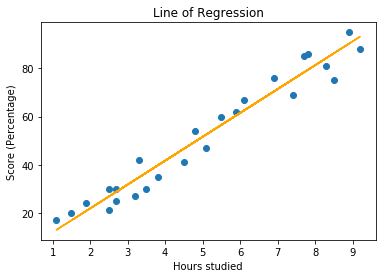

In [10]:
Y = lin_reg.coef_*x+lin_reg.intercept_  # Line of Linear Regression

plt.scatter(x, y)                       # Scatter plot for data in dataset
plt.plot(x,Y,color="orange");           # Plotting the regression line
plt.title("Line of Regression")
plt.xlabel("Hours studied")
plt.ylabel("Score (Percentage)")
plt.show()

### _Predicting Scores_

In [11]:
print(x_test) #Test data (Number of Hours studied)
y_pred = lin_reg.predict(x_test) # Predicted scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### _Comparing Actual and Predicted Scores_

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


_Bar graph showing the comparison of actual and predicted values_

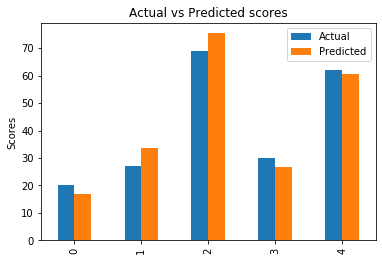

In [13]:
df.plot(kind='bar')        
plt.ylabel('Scores')
plt.title('Actual vs Predicted scores')
plt.show()

### _Evaluating the model_

In [14]:
#Calculate error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### _What will be predicted score if a student studies for 9.25 hrs/ day?_

In [15]:
hours = 9.25
predict_score = lin_reg.predict([[hours]]) # Predict score using the model
print("Number of Hours =",hours)
print("Predicted Score =",predict_score[0])

Number of Hours = 9.25
Predicted Score = 93.69173248737538


####  If a student studies for 9.25 hrs/ day, the predicted score is 93.69%